# Questions:
1. What is the Stockists number for all drink subcategories?
2. What is the average RoS for all drink subcategories?
3. How RoS for all subcategories has been changing over time?

# Loading in dataset and libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the working directory
working_directory = 'C:/Users/Adrian/OneDrive - CANDCGROUPPLC/Documents/Projects'  # Replace with your desired directory path
os.chdir(working_directory)

df = pd.read_excel('branddatamay.xlsx')  # Alternatively, load an Excel file

C:\Users\Adrian\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                   Brand                        Brewer  ABV Band  \
0               Guinness                     Diageo GB  Standard   
1  Peroni Nastro Azzurro                      Asahi UK   Premium   
2              Budweiser  Budweiser Brewing Group UK&I   Premium   
3           Corona Extra  Budweiser Brewing Group UK&I   Premium   
4          Birra Moretti                   Heineken UK   Premium   

  Type Of Alcohol          Country      TY Value      LY Value     4YA Value  \
0           Stout  ENGLAND & WALES  1.212176e+09  1.009297e+09  6.968812e+08   
1           Lager  ENGLAND & WALES  7.699909e+08  8.082669e+08  6.386178e+08   
2           Lager  ENGLAND & WALES  1.347664e+08  1.478763e+08  1.475035e+08   
3           Lager  ENGLAND & WALES  2.107635e+08  2.262674e+08  1.494667e+08   
4           Lager  ENGLAND & WALES  1.003165e+09  9.706575e+08  3.924389e+08   

      TY Volume     LY Volume  ...  Stockists 4YA     ROS TY     ROS LY  \
0  1

In [4]:
# Display basic information about the dataset
print("\nBasic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    1799 non-null   object 
 1   Brewer                   1797 non-null   object 
 2   ABV Band                 1797 non-null   object 
 3   Type Of Alcohol          1797 non-null   object 
 4   Country                  1797 non-null   object 
 5   TY Value                 1529 non-null   float64
 6   LY Value                 1517 non-null   float64
 7   4YA Value                1583 non-null   float64
 8   TY Volume                1529 non-null   float64
 9   LY Volume                1517 non-null   float64
 10  4YA Volume               1583 non-null   float64
 11  Stockists TY             1529 non-null   float64
 12  Stockists LY             1517 non-null   float64
 13  Stockists 4YA            1583 non-null   float64
 14  ROS 

In [4]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           TY Value      LY Value     4YA Value     TY Volume     LY Volume  \
count  1.529000e+03  1.517000e+03  1.583000e+03  1.529000e+03  1.517000e+03   
mean   2.048997e+07  2.025701e+07  1.741211e+07  2.599312e+04  2.677364e+04   
std    4.058445e+08  3.994277e+08  3.511298e+08  5.153560e+05  5.285878e+05   
min    3.200000e-02  7.800000e-02  6.074700e+01  6.000000e-05  1.300000e-04   
25%    3.813124e+04  4.386103e+04  3.988131e+04  4.036889e+01  4.950634e+01   
50%    2.384098e+05  2.776319e+05  2.560283e+05  2.829761e+02  3.265757e+02   
75%    1.777120e+06  1.915845e+06  1.613842e+06  2.131142e+03  2.431789e+03   
max    1.566458e+10  1.536494e+10  1.378169e+10  1.987174e+07  2.030780e+07   

         4YA Volume  Stockists TY  Stockists LY  Stockists 4YA       ROS TY  \
count  1.583000e+03   1529.000000   1517.000000    1583.000000  1529.000000   
mean   2.556226e+04   1335.185146   1446.807976    1264.538365    10.882794   
std    5.169047e+05   4381.630

# Cleaning


Missing Values:
Brand                        1
Brewer                       3
ABV Band                     3
Type Of Alcohol              3
Country                      3
TY Value                   271
LY Value                   283
4YA Value                  217
TY Volume                  271
LY Volume                  283
4YA Volume                 217
Stockists TY               271
Stockists LY               283
Stockists 4YA              217
ROS TY                     271
ROS LY                     283
ROS 4YA                    217
Value Change Vs LY         219
Volume Change Vs LY        219
%Value Change Vs LY        283
%Volume Change Vs LY       283
%Stockists Change Vs LY    283
%ROS Change Vs LY          283
dtype: int64


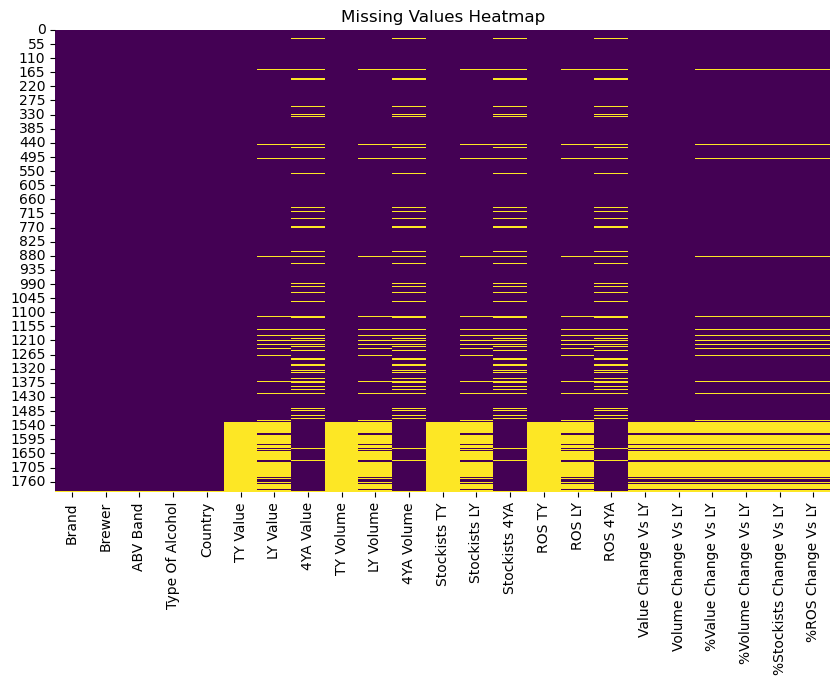

In [6]:
#handling missing data
# Handling Missing Values
# Display the number of missing values for each column
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Handle missing values
# Example: Fill missing values with the mean of the column
# df.fillna(df.mean(), inplace=True)

# Example: Fill missing values with the median of the column
# df.fillna(df.median(), inplace=True)

# Example: Fill missing values with the mode of the column
# df.fillna(df.mode().iloc[0], inplace=True)

# Example: Drop rows with missing values
df.dropna(inplace=True)

###comment: would be informative to explore brands with missing data - why they have been discontinued?

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Brand                      0
Brewer                     0
ABV Band                   0
Type Of Alcohol            0
Country                    0
TY Value                   0
LY Value                   0
4YA Value                  0
TY Volume                  0
LY Volume                  0
4YA Volume                 0
Stockists TY               0
Stockists LY               0
Stockists 4YA              0
ROS TY                     0
ROS LY                     0
ROS 4YA                    0
Value Change Vs LY         0
Volume Change Vs LY        0
%Value Change Vs LY        0
%Volume Change Vs LY       0
%Stockists Change Vs LY    0
%ROS Change Vs LY          0
dtype: int64


In [8]:
# Handling Duplicate Rows
# Display the number of duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)


Duplicate Rows:
0


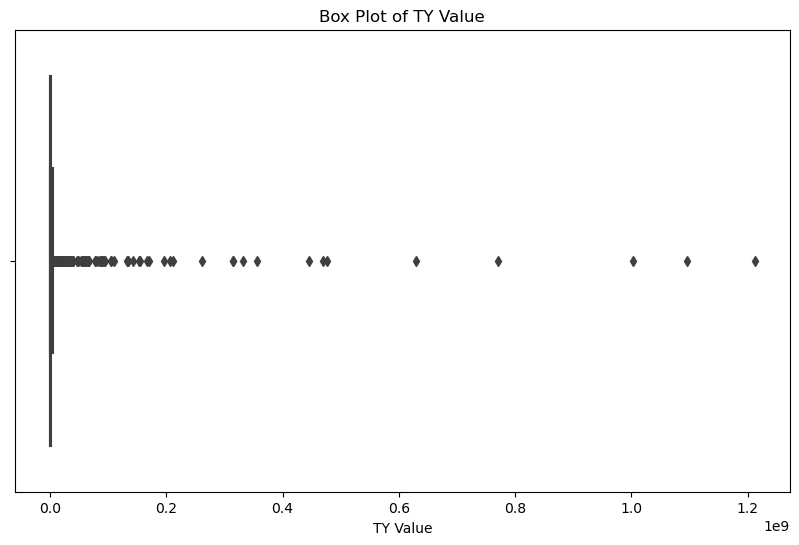

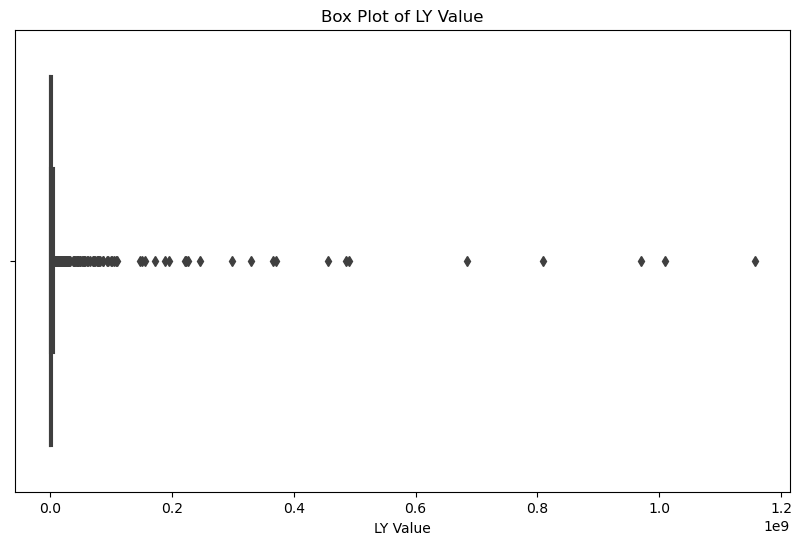

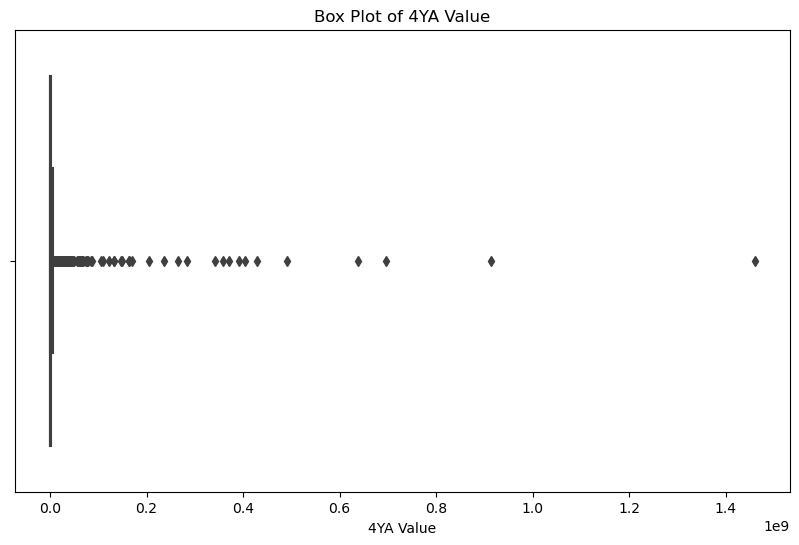

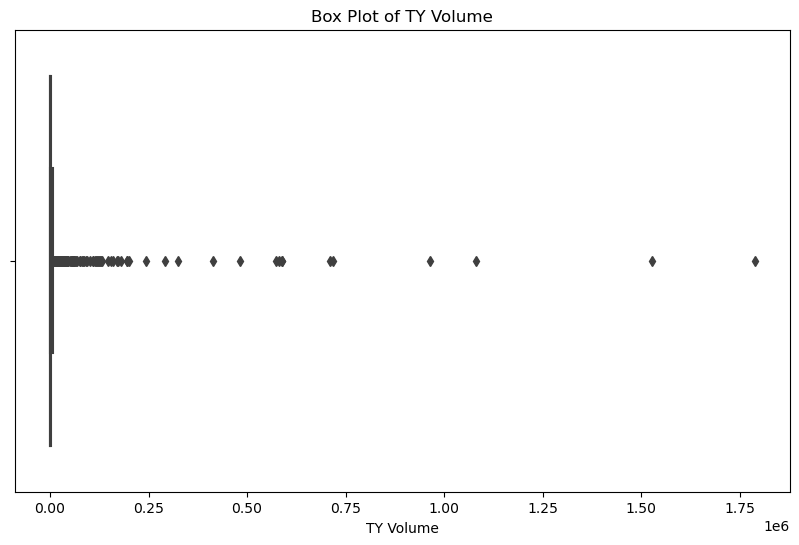

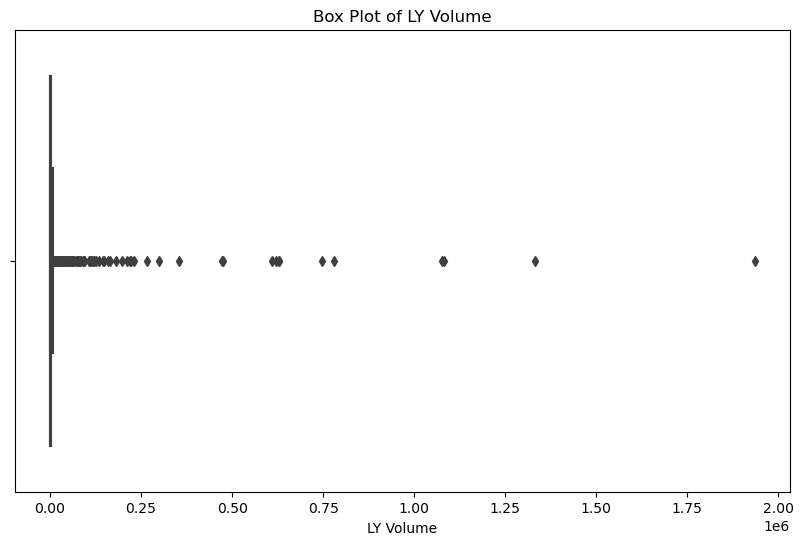

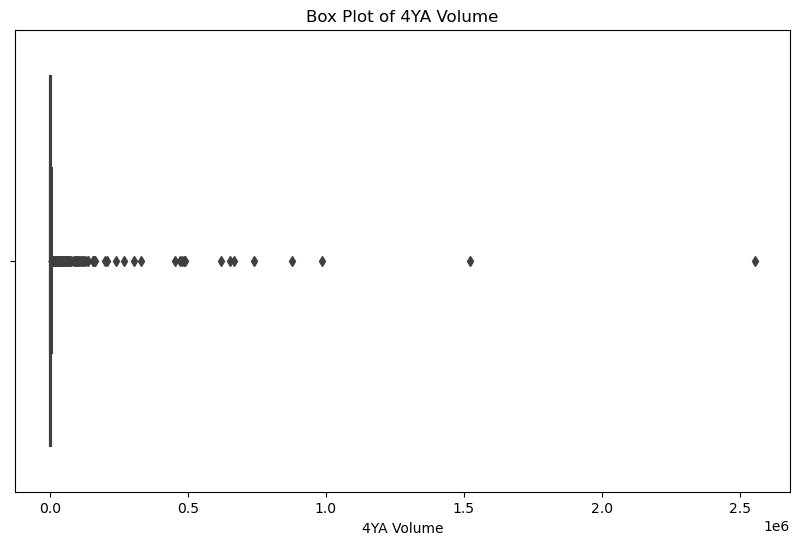

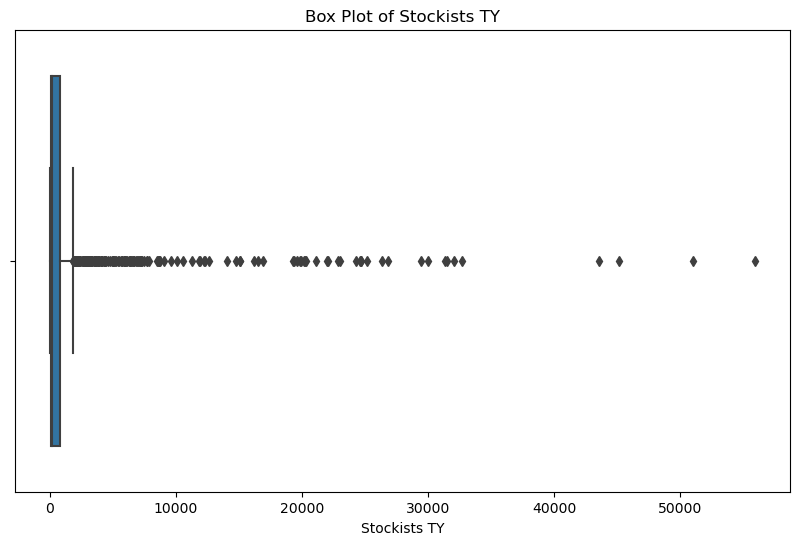

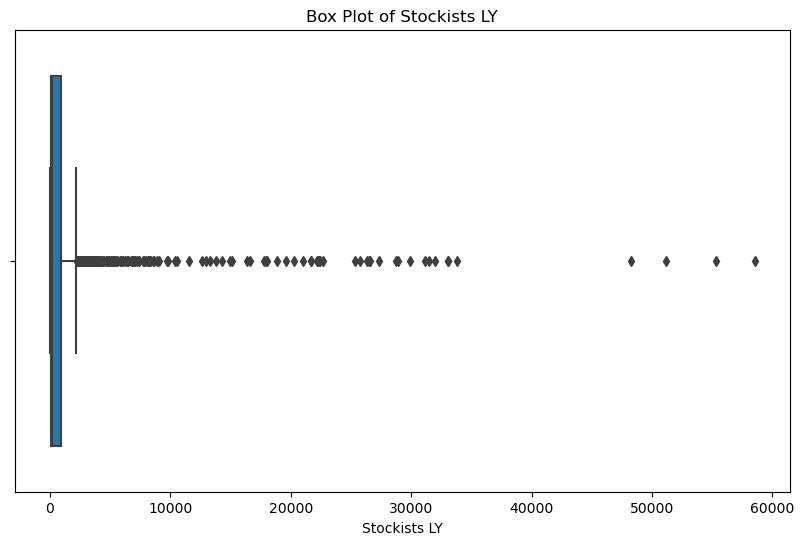

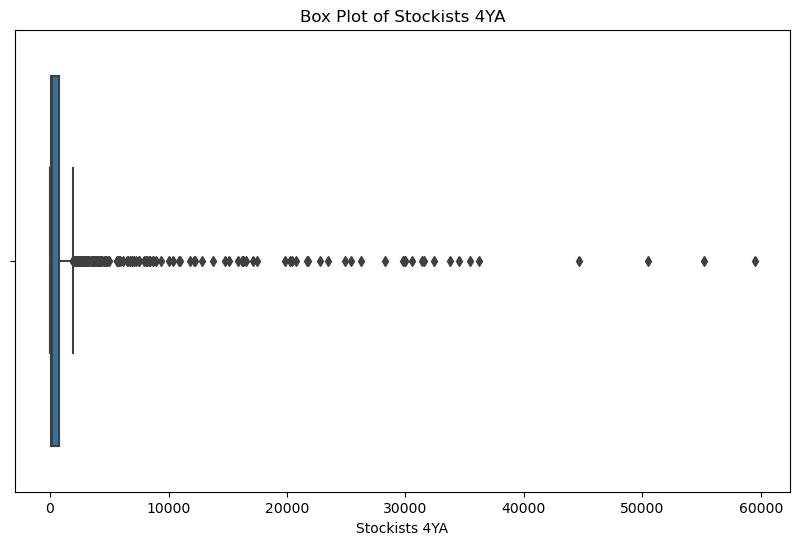

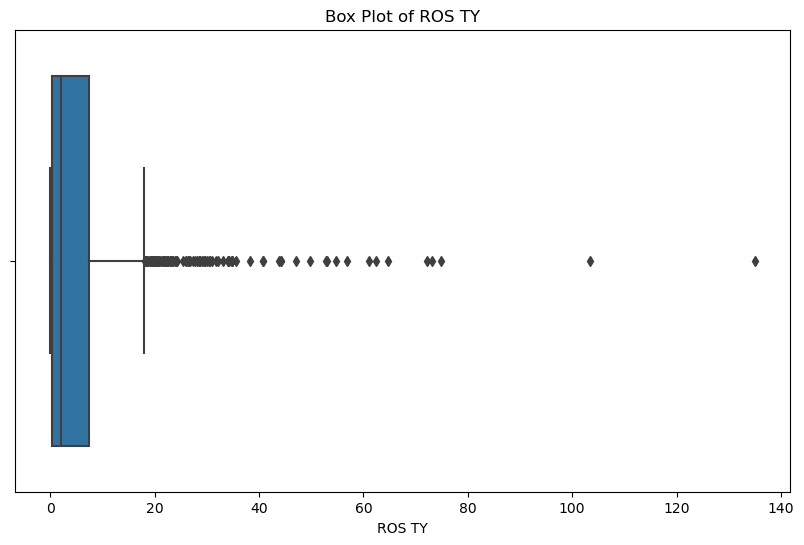

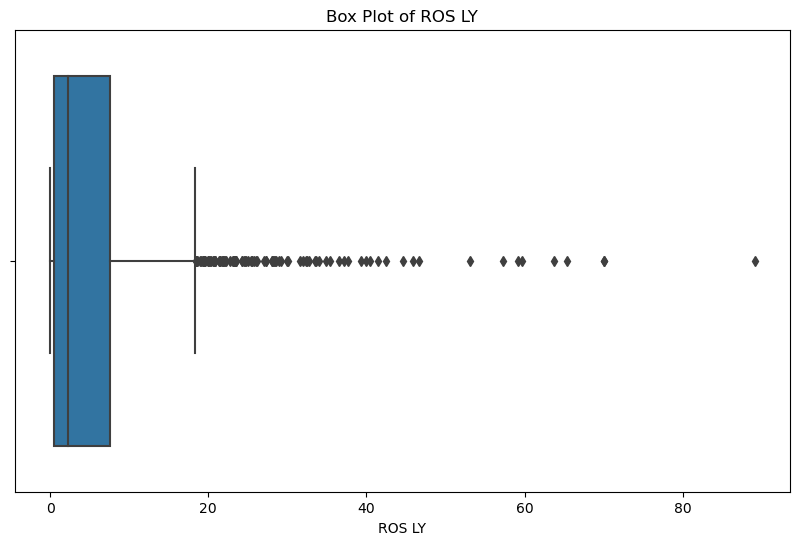

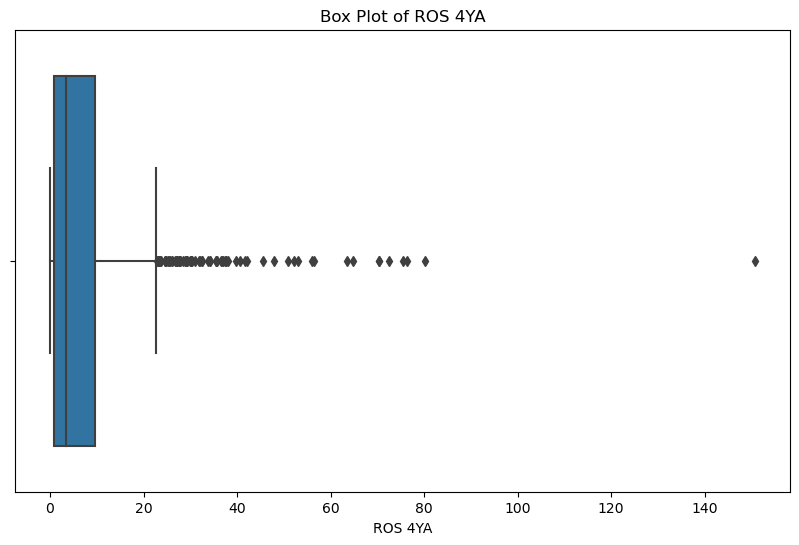

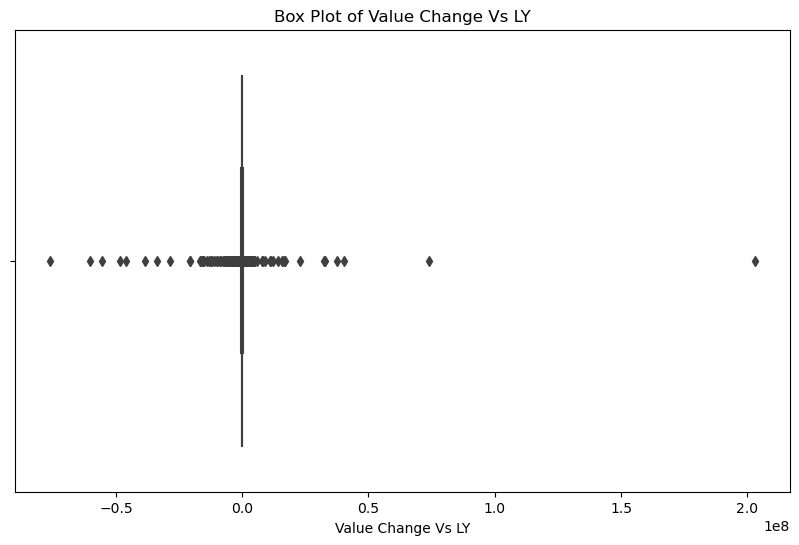

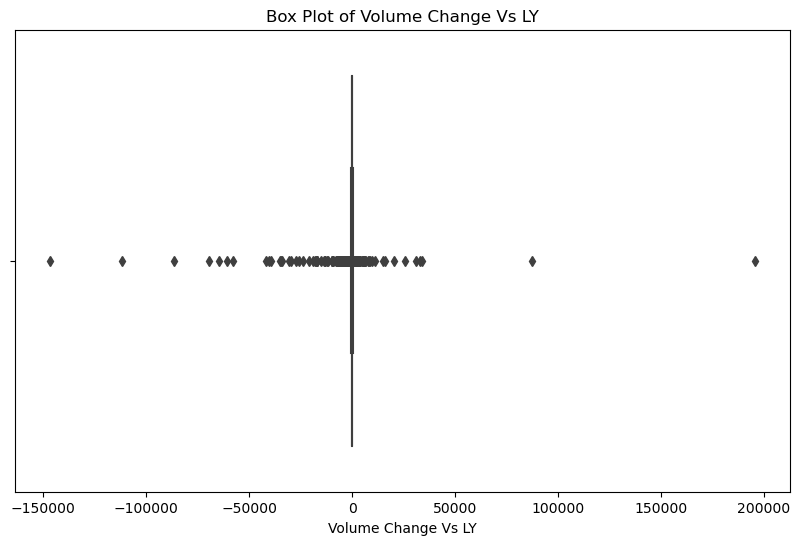

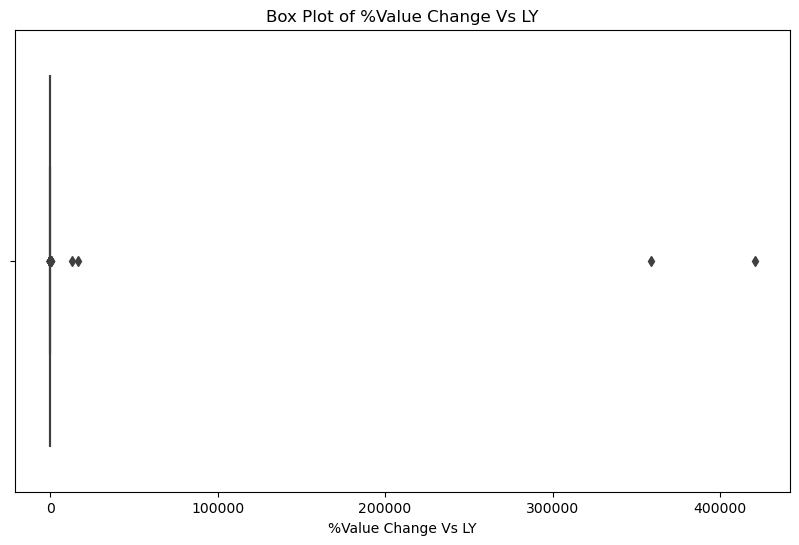

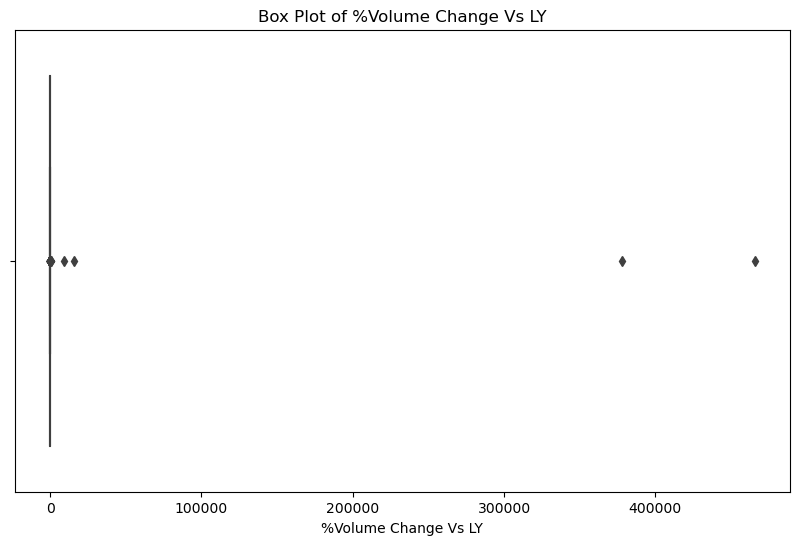

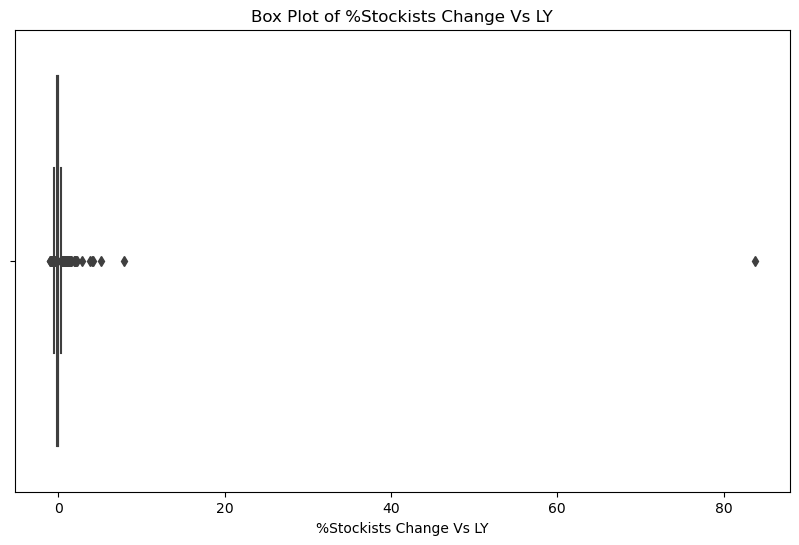

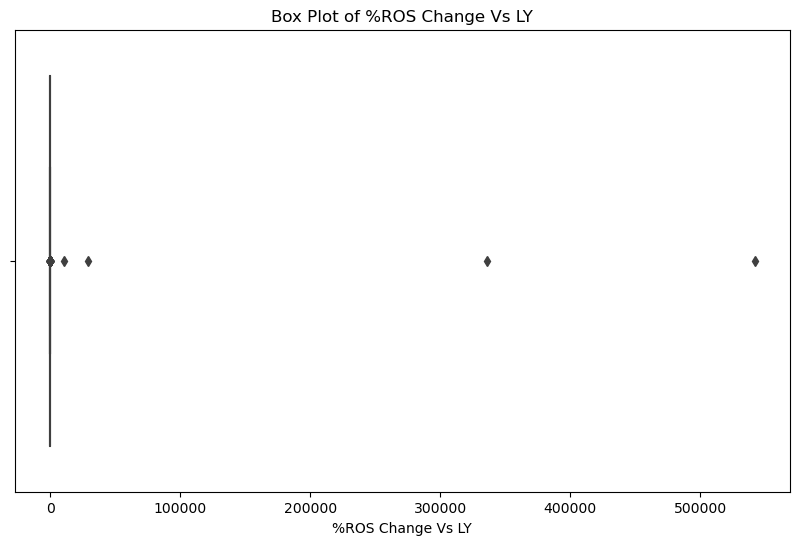

In [10]:
#Handling Outliers
# Visualize numerical features to detect outliers
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Handle outliers
# Example: Remove outliers using Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df[numerical_features]))
df = df[(z_scores < 3).all(axis=1)]

In [35]:
#Filtering out values above 100% and below -100% for RoS and Stockists

df_ros_stockists = df[["Brand", "Brewer", "Type Of Alcohol", "Country", "Stockists TY", "%ROS Change Vs LY", "%Stockists Change Vs LY"]]

df_ros_stockists.head()

,Brand,Brewer,Type Of Alcohol,Country,Stockists TY,%ROS Change Vs LY,%Stockists Change Vs LY
34,Old Mout Cider Pineapple & Raspberry,Heineken UK,Cider,ENGLAND & WALES,15099.238424,0.022652,0.054606
37,All Other Brewers,Other Brewers,Ale,ENGLAND & WALES,14037.689305,0.017592,-0.061868
38,All Other Brewers,Other Brewers,Lager,ENGLAND & WALES,12586.824237,-0.093113,-0.168860
39,All Other Brewers,Other Brewers,Cider,ENGLAND & WALES,12286.097985,-0.061953,-0.110974
40,Peroni Nastro Azzurro Gluten Free,Asahi UK,Lager,ENGLAND & WALES,12234.629246,0.006845,-0.053893


In [38]:
filtered_ros_stockists = df[(df["%ROS Change Vs LY"] >= -1) & (df['%ROS Change Vs LY'] <= 1) & (df["%Stockists Change Vs LY"] >= -1) & (df['Stockists TY'] >= 1000) & (df['%Stockists Change Vs LY'] <= 1)]

filtered_ros_stockists.describe()

,TY Value,LY Value,4YA Value,TY Volume,LY Volume,4YA Volume,Stockists TY,Stockists LY,Stockists 4YA,ROS TY,ROS LY,ROS 4YA,Value Change Vs LY,Volume Change Vs LY,%Value Change Vs LY,%Volume Change Vs LY,%Stockists Change Vs LY,%ROS Change Vs LY
count,2.380000e+02,2.380000e+02,2.380000e+02,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,2.380000e+02,238.000000,238.000000,238.000000,238.000000,238.000000
mean,1.395013e+07,1.421019e+07,1.276209e+07,17092.995356,18077.747165,17718.018899,3230.083883,3461.427449,2849.921953,4.842471,4.725644,5.397861,-2.600625e+05,-984.751809,0.028760,-0.012634,-0.060216,0.041265
std,2.176821e+07,2.147777e+07,1.922574e+07,27517.806199,28399.266646,28264.340210,2568.860702,2724.542143,2579.521861,5.747746,5.453347,5.855589,3.833836e+06,4487.125672,0.352096,0.320399,0.181072,0.227594
min,2.013927e+05,1.537800e+05,1.008210e+04,179.864520,187.509230,10.917710,1012.344734,831.379203,13.560946,0.133435,0.133393,0.100201,-1.516015e+07,-19039.691420,-0.945554,-0.945108,-0.467460,-0.930452
25%,1.793782e+06,2.027149e+06,1.452272e+06,1804.028562,1884.396100,1581.457318,1468.377167,1609.511656,1187.725821,0.809323,0.763644,0.759387,-1.352016e+06,-2211.055213,-0.164851,-0.184705,-0.149837,-0.076999
50%,6.018866e+06,5.667039e+06,5.166960e+06,6505.078145,6676.054365,5446.307915,2262.687136,2503.825827,2076.155600,2.584476,2.572358,2.900169,-1.280925e+05,-255.733450,-0.047587,-0.083622,-0.101359,0.026026
75%,1.590323e+07,1.735949e+07,1.598824e+07,19778.790457,21367.270753,19577.456988,4053.853452,4205.189880,3659.721444,6.775617,7.268273,8.885235,4.494373e+05,340.068115,0.153390,0.103645,-0.033612,0.147151
max,1.666664e+08,1.500485e+08,1.087964e+08,173608.091610,180627.704110,160038.639600,15099.238424,15144.055790,15145.236938,29.465243,28.004352,30.942814,2.274771e+07,25865.037680,2.152016,1.646072,0.994565,0.906539


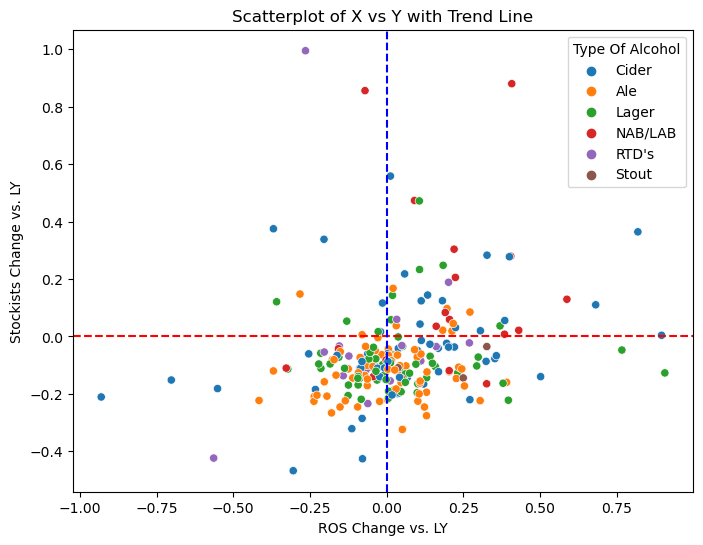

In [39]:
# Scatterplot with trend line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_ros_stockists, x='%ROS Change Vs LY', y='%Stockists Change Vs LY', hue='Type Of Alcohol')
plt.title('Scatterplot of X vs Y with Trend Line')
plt.xlabel('ROS Change vs. LY')
plt.ylabel('Stockists Change vs. LY')
plt.axhline(y=0, color='r', linestyle='--', label='y=10')
plt.axvline(x=0, color='b', linestyle='--', label='x=5')
plt.show()



In [52]:
import plotly.express as px

# Create scatterplot with Plotly
fig = px.scatter(filtered_ros_stockists, x='%ROS Change Vs LY', y='%Stockists Change Vs LY', color='Type Of Alcohol', hover_data=['Brand', "Country"])

# Update the size of the markers
fig.update_traces(marker=dict(size=15))  # Set all markers to a size of 15

# Customize the layout
fig.update_layout(
        title={
        'text': "Interactive Scatterplot of %RoS Change vs. LY vs %Stockists Change vs. LY<br><sup>Brands with stockists >1k | Brands with over +100% and below -100% for RoS and Stockists change not shown</sup>",
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='%ROS Change Vs LY',
    yaxis_title='%Stockists Change Vs LY'
)

# Show the plot
fig.show()


# Save the plot as an HTML file
#fig.write_html("interactive_scatterplot.html")




# 